# Making Your First Map: Seismograph and Seismicity in Vietnam

In this notebook, we will learn some skills to build a geographical map. These are important skills to visualize data and get a sense of their spatial distribution. The skills will be introduced through a series of excercices to graps and analyse some interesting seismc pattern in Vietnam. The expected learning outcome of this practical includes

- Getting familarize to geographical mapping skills and visualize data
- Download seismic metadata from remote servers
- Analyse serial pattern of local seismicity

## Brief Introduction to Jupyter Notebook

## Building your first map

In [ ]:
%config InlineBackend.figure_format = 'retina'

In [ ]:
# !pip install basemap obspy

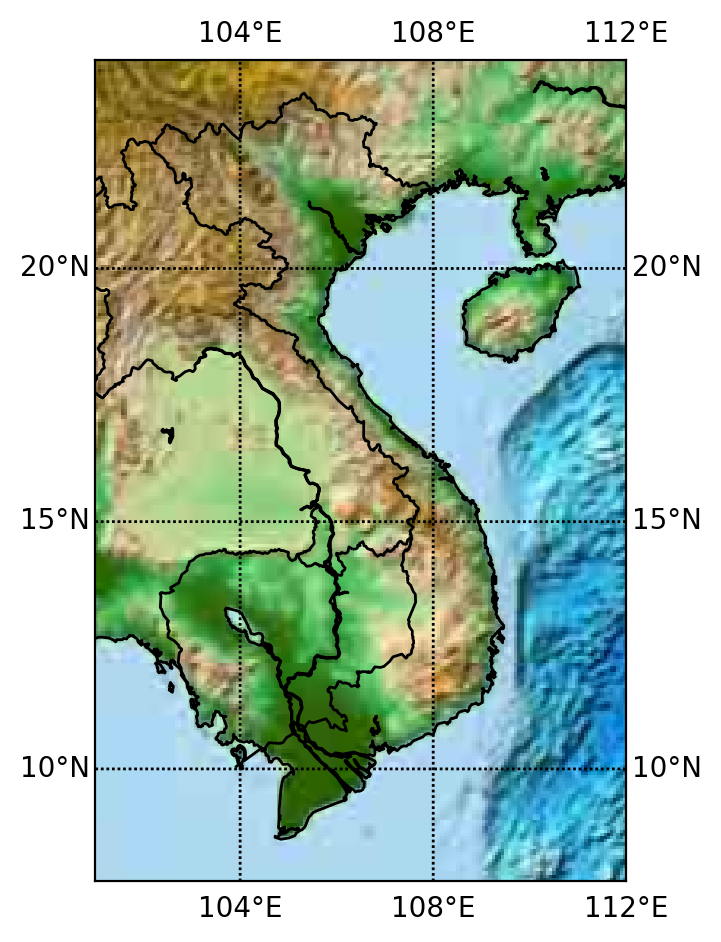

In [3]:
# import basemap and matplotlib
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# create a new figure and axis
fig, ax = plt.subplots()
# initialize the basemap, specifing the projection, the gegraphic buondary, and resolution
# the initialzed map instance is attached to the axis ax
m = Basemap(projection='merc',ax=ax, llcrnrlat=7.7, urcrnrlat=24,
            llcrnrlon=101, urcrnrlon=112, resolution='i')
# draw coastlines
m.drawcoastlines(linewidth=1)
# draw country boundaries
m.drawcountries(linewidth=1)
# draw parallels and meridians
m.drawparallels(range(10, 25, 5), labels=[1,1,0,0])
m.drawmeridians(range(100, 125, 4), labels=[0,0,1,1])
# m.drawrivers(linewidth=1, color='b')
# draw etopo relief (note: the data is hard-coded in the basemap module)
m.etopo()

# stretch out the axis to fir the figure space
fig.tight_layout()
plt.show()

Congratulations on your first map!

Further reading on map: https://matplotlib.org/basemap/stable/index.html

## Plotting data on a map

Retrieve data topographic relief data and plot on the map with more control.

## Downloading station metadata and earthquake catalog

Web interface:

Station metadata search: https://ds.iris.edu/mda/

Waveform download tool: https://ds.iris.edu/wilber3/find_event

Global Centroid-Moment Tensor: https://www.globalcmt.org/

International Seismological Centre: https://www.isc.ac.uk/iscbulletin/search/

US Geophiscal Survey: https://earthquake.usgs.gov/earthquakes/map/

Programing interface:


App interface:

PyWEED: https://ds.iris.edu/ds/nodes/dmc/software/downloads/pyweed/

In [4]:
# import obspy module to download metadata
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
# specify the client
client = Client("IRIS")

# query the stations in the region of interest
startime = UTCDateTime("2000-01-01")
endtime = UTCDateTime("2025-01-01")
inventory = client.get_stations(minlatitude=7.7, maxlatitude=24, minlongitude=101, maxlongitude=110.5,
                                starttime=startime, endtime=endtime, channel="LH*", level="channel")
print (inventory) # print the inventory to see the information

# query the seismic events in the region of interest
catalog = client.get_events(minlatitude=7.7, maxlatitude=24, minlongitude=101, maxlongitude=110.5,
                            starttime=startime, endtime=endtime, minmagnitude=2, catalog="ISC")
print (catalog) # print the catalog to see the information

Inventory created at 2025-03-12T10:55:03.797000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2000-01-...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (4):
			CD, IC, PS, RM
		Stations (6):
			CD.QIZ (Qiongzhong, Hainan Province, China)
			IC.QIZ (Qiongzhong, Hainan Province, China) (2x)
			PS.VIVO (Vinh, Vietnam)
			RM.DLV (Dalat Central Vietnam)
			RM.SLV (Son La Vietnam)
		Channels (28):
			CD.QIZ..LHZ, CD.QIZ..LHN, CD.QIZ..LHE, IC.QIZ.00.LHZ (4x), 
			IC.QIZ.00.LHN (2x), IC.QIZ.00.LHE (2x), IC.QIZ.00.LH1 (2x), 
			IC.QIZ.00.LH2 (3x), IC.QIZ.10.LHZ, IC.QIZ.10.LH1, IC.QIZ.10.LH2, 
			PS.VIVO..LHZ, PS.VIVO..LHX, PS.VIVO..LHY, RM.DLV..LHZ, RM.DLV..LHN
			RM.DLV..LHE, RM.SLV..LHZ, RM.SLV..LHN, RM.SLV..LHE
807 Event(s) in Catalog:
2015-07-01T20:00:28.200000Z | +23.973, +102.833 | 3.3  mb
2015-06-12T08:39:17.910000Z | +19.298, +104.743 | 3.8  mb
...
2000-01-18T08:00:12.700000Z | +20.705, +

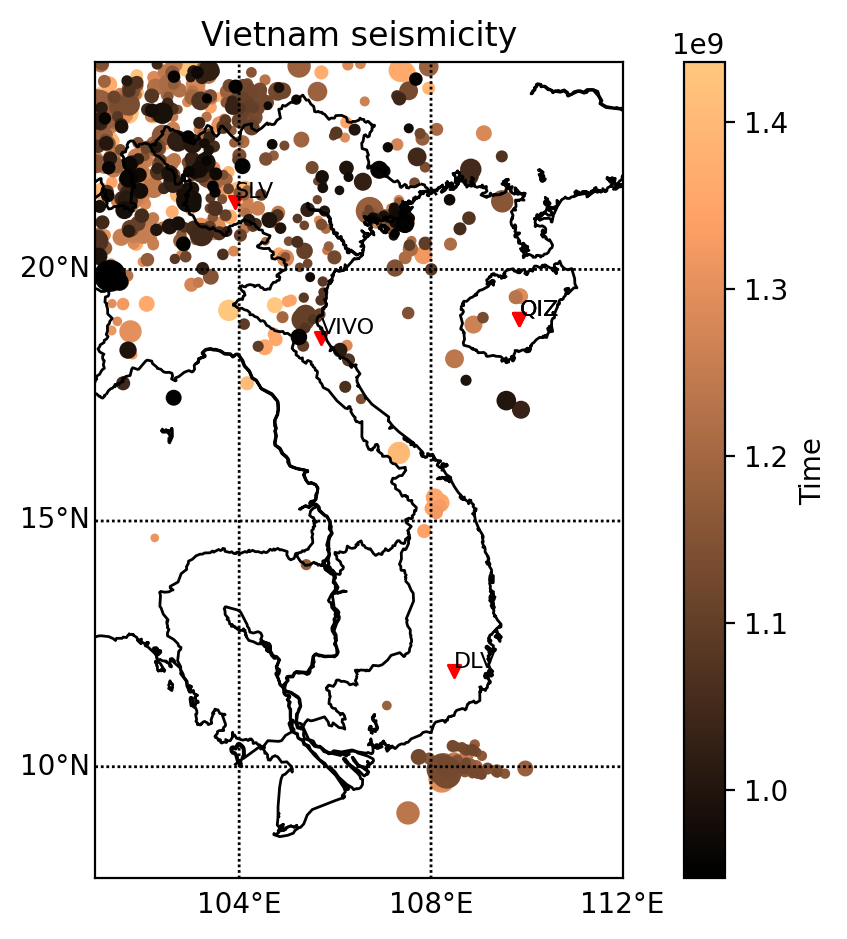

In [11]:
import numpy as np

# create a new figure and axis
fig, ax = plt.subplots()
# initialize the basemap, specifing the projection, the gegraphic buondary, and resolution
# the initialzed map instance is attached to the axis ax
m = Basemap(projection='merc',ax=ax, llcrnrlat=7.7, urcrnrlat=24,
            llcrnrlon=101, urcrnrlon=112, resolution='i')
# draw coastlines
m.drawcoastlines(linewidth=1)
# draw country boundaries
m.drawcountries(linewidth=1)
# draw parallels and meridians
m.drawparallels(range(10, 25, 5), labels=[1,0,0,0])
m.drawmeridians(range(100, 125, 4), labels=[0,0,0,1])


# plot seismic events on the map
evla = np.array([e.origins[0].latitude for e in catalog])
evlo = np.array([e.origins[0].longitude for e in catalog])
evmag = np.array([e.magnitudes[0].mag for e in catalog])
evtime = np.array([e.origins[0].time for e in catalog])
mappable = m.scatter(evlo, evla, c=evtime, cmap='copper', latlon=True, s=np.exp(evmag)/2)

# plot stations on the map
for net in inventory:
    for sta in net:
        lon = sta.longitude
        lat = sta.latitude
        x, y = m(lon, lat)
        m.scatter(x, y, marker='v', color='r', s=20)
        plt.text(x, y, sta.code, fontsize=8, ha='left', va='bottom')

cax = fig.colorbar(mappable, ax=ax, label='Time')
# set cax tick by years
cax.xtick

ax.set_title('Vietnam seismicity')

# stretch out the axis to fir the figure space
fig.tight_layout()
plt.show()

### Dak Nong earthquake sequences

We now focus on the Dak Nong earthquake sequences to see its time evolutions as function of time and it correlation with dam charging activities.